In [207]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
import statsmodels.formula.api as smf

%matplotlib inline

In [208]:
DC_properties = pd.read_csv("datasets/DC_Properties.csv")
DC_properties.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [209]:
DC_properties.shape

(158957, 49)

In [210]:
DC_properties.drop(['STRUCT', 'STORIES', 'NUM_UNITS',
                       'Unnamed: 0', 'SALE_NUM','QUALIFIED','BLDG_NUM',
                       'STYLE', 'LATITUDE', 'LONGITUDE',
                   'X', 'Y', 'WARD', 'SQUARE',
                   'CENSUS_BLOCK', 'EXTWALL', 'ROOF', 'INTWALL',
                    'CENSUS_TRACT', 'ASSESSMENT_NBHD', 'LIVING_GBA',
                    'ASSESSMENT_SUBNBHD', 'GIS_LAST_MOD_DTTM',
                   'HEAT', 'USECODE', 'LANDAREA', 'FULLADDRESS', 'CMPLX_NUM', 'NATIONALGRID'],
                   axis=1, inplace = True)

In [211]:
DC_properties.columns

Index(['BATHRM', 'HF_BATHRM', 'AC', 'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL', 'EYB',
       'SALEDATE', 'PRICE', 'GBA', 'GRADE', 'CNDTN', 'KITCHENS', 'FIREPLACES',
       'SOURCE', 'CITY', 'STATE', 'ZIPCODE', 'QUADRANT'],
      dtype='object')

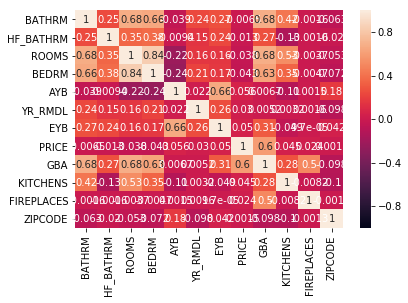

In [212]:
corr = DC_properties.corr()

sns.heatmap(corr, vmin=-1, annot=True)

In [213]:
DC_price = DC_properties[DC_properties['PRICE'].notnull()]
DC_price.shape

(98216, 20)

In [214]:
DC_realRM_price = DC_price[(DC_price['BEDRM']!= 0) &
                           (DC_price['BEDRM']<= 8) &
                           (DC_price['PRICE']!= 0) &
                          (DC_price['PRICE']<1500000) &
                          (DC_price['BATHRM']!= 0) &
                        (DC_price['BATHRM']<= 6)]
DC_realRM_price.shape

(90589, 20)

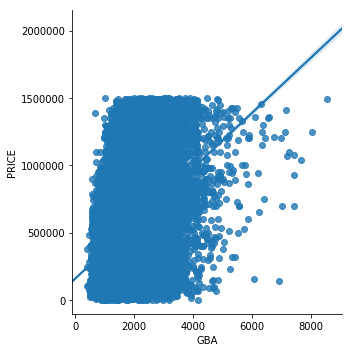

In [217]:
sns.lmplot(x='GBA', y='PRICE', data=DC_realRM_price)

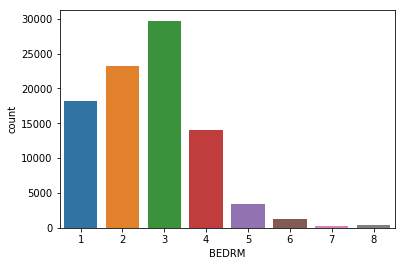

In [218]:
sns.countplot(x='BEDRM',data=DC_realRM_price)

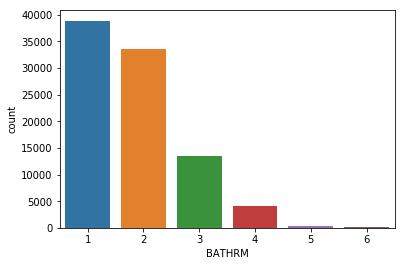

In [219]:
sns.countplot(x='BATHRM',data=DC_realRM_price)

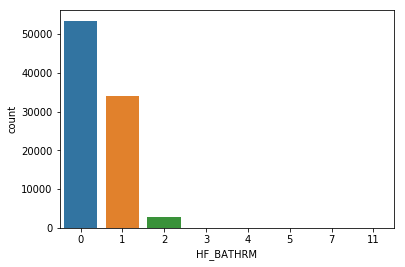

In [220]:
sns.countplot(x='HF_BATHRM',data=DC_realRM_price)

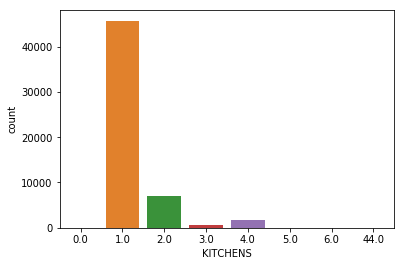

In [221]:
sns.countplot(x='KITCHENS',data=DC_realRM_price)

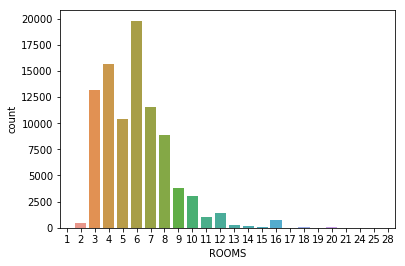

In [222]:
sns.countplot(x='ROOMS',data=DC_realRM_price)

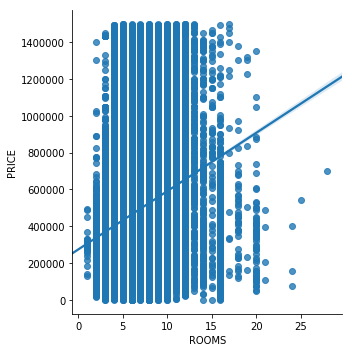

In [223]:
sns.lmplot(x='ROOMS', y='PRICE', data=DC_realRM_price)

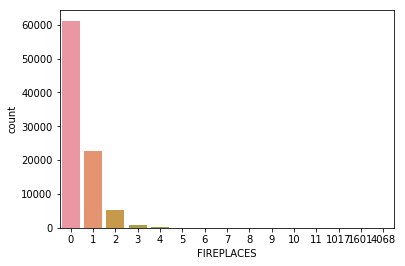

In [224]:
sns.countplot(x='FIREPLACES',data=DC_realRM_price)

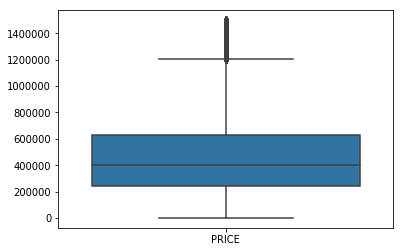

In [228]:
price_df = DC_realRM_price.drop(['BATHRM', 'HF_BATHRM', 'AC', 'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL', 'EYB',
       'SALEDATE', 'GRADE', 'CNDTN', 'KITCHENS', 'FIREPLACES',
       'SOURCE', 'CITY', 'STATE', 'ZIPCODE', 'QUADRANT', 'GBA'],
                   axis=1)
sns.boxplot(data=price_df)

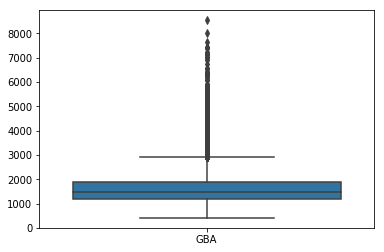

In [229]:
GBA_df = DC_realRM_price.drop(['BATHRM', 'HF_BATHRM', 'AC', 'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL', 'EYB',
       'SALEDATE', 'GRADE', 'CNDTN', 'KITCHENS', 'FIREPLACES',
       'SOURCE', 'CITY', 'STATE', 'ZIPCODE', 'QUADRANT', 'PRICE'],
                   axis=1)
sns.boxplot(data=GBA_df)

In [230]:
DC_realRM2_price = DC_realRM_price[DC_realRM_price['GBA'].notnull()]
DC_realRM2_price.shape

(55086, 20)

In [231]:
DC_real_Count_price = DC_realRM2_price[(DC_realRM2_price['BEDRM']!= 0) &
                           (DC_realRM2_price['BEDRM']<= 6) &
                           (DC_realRM2_price['PRICE']!= 0) &
                            (DC_realRM2_price['PRICE']>=234000) &
                          (DC_realRM2_price['PRICE']<1200000) &
                           (DC_realRM2_price['KITCHENS']!=0) &
                           (DC_realRM2_price['KITCHENS']<=4) &
                            (DC_realRM2_price['FIREPLACES']<=3) &
                           (DC_realRM2_price['BATHRM']!= 0) &
                            (DC_realRM2_price['BATHRM']<= 4) &
                            (DC_realRM2_price['HF_BATHRM']<= 2) &
                            (DC_realRM2_price['GBA']>= 1100) &
                            (DC_realRM2_price['GBA']<= 2000)]
DC_real_Count_price.shape

(25315, 20)

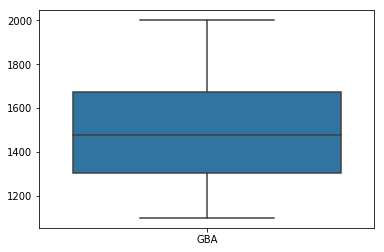

In [234]:
GBA2_df = DC_real_Count_price.drop(['BATHRM', 'HF_BATHRM', 'AC', 'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL', 'EYB',
       'SALEDATE', 'GRADE', 'CNDTN', 'KITCHENS', 'FIREPLACES',
       'SOURCE', 'CITY', 'STATE', 'ZIPCODE', 'QUADRANT', 'PRICE'],
                   axis=1)
sns.boxplot(data=GBA2_df)

In [235]:
DC_real_Count_price.describe()

,BATHRM,HF_BATHRM,ROOMS,BEDRM,AYB,YR_RMDL,EYB,PRICE,GBA,KITCHENS,FIREPLACES,ZIPCODE
count,25315.000000,25315.000000,25315.000000,25315.000000,25289.000000,15528.000000,25315.000000,2.531500e+04,25315.000000,25315.000000,25315.000000,25315.000000
mean,2.093739,0.699111,6.982382,3.247245,1934.126616,2005.249742,1971.191468,5.613867e+05,1495.354335,1.152992,0.558720,20010.648469
std,0.757741,0.557053,1.347912,0.707567,32.162758,19.958119,17.027590,2.262731e+05,233.189138,0.381614,0.685389,7.309814
min,1.000000,0.000000,2.000000,1.000000,1776.000000,20.000000,1940.000000,2.340000e+05,1100.000000,1.000000,0.000000,20001.000000
25%,2.000000,0.000000,6.000000,3.000000,1912.000000,2003.000000,1962.000000,3.650000e+05,1304.000000,1.000000,0.000000,20003.000000
50%,2.000000,1.000000,7.000000,3.000000,1926.000000,2009.000000,1967.000000,5.290000e+05,1476.000000,1.000000,0.000000,20011.000000
75%,3.000000,1.000000,8.000000,4.000000,1942.000000,2013.000000,1975.000000,7.319700e+05,1672.000000,1.000000,1.000000,20016.000000
max,4.000000,2.000000,16.000000,6.000000,2018.000000,2018.000000,2018.000000,1.199000e+06,2000.000000,4.000000,3.000000,20052.000000


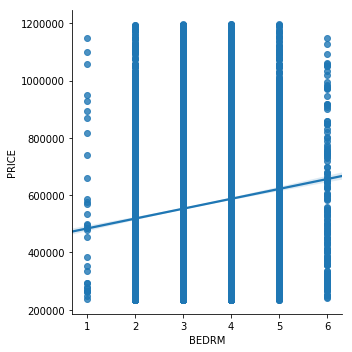

In [236]:
sns.lmplot(x='BEDRM', y='PRICE', data=DC_real_Count_price)

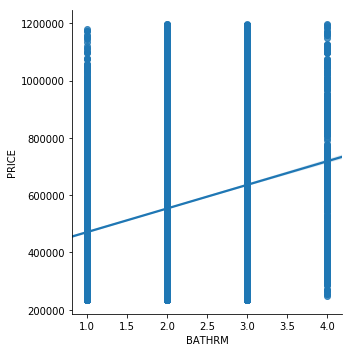

In [237]:
sns.lmplot(x='BATHRM', y='PRICE', data=DC_real_Count_price)

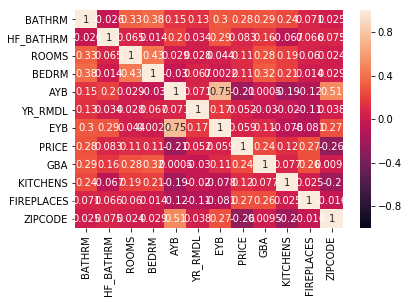

In [238]:
corr = DC_real_Count_price.corr()

sns.heatmap(corr, vmin=-1, annot=True)

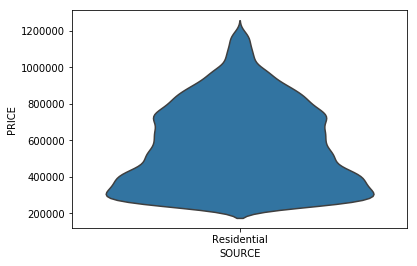

In [239]:
sns.violinplot(x='SOURCE', y='PRICE', data=DC_real_Count_price, inner=None)

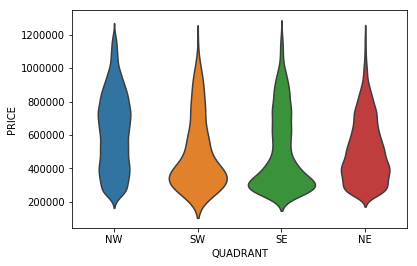

In [240]:
sns.violinplot(x='QUADRANT',y='PRICE', data=DC_real_Count_price, inner=None)

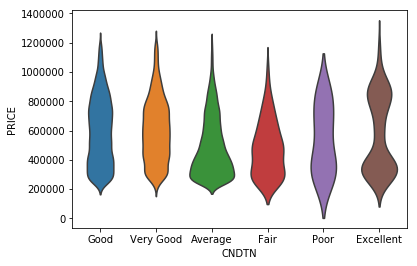

In [241]:
sns.violinplot(x='CNDTN',y='PRICE', data=DC_real_Count_price, inner=None)

In [242]:
result = smf.ols('PRICE ~ BEDRM + BATHRM + FIREPLACES + KITCHENS + CNDTN',
                 data=DC_real_Count_price).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     579.6
Date:                Wed, 03 Jul 2019   Prob (F-statistic):               0.00
Time:                        21:13:19   Log-Likelihood:            -3.4567e+05
No. Observations:               25315   AIC:                         6.914e+05
Df Residuals:                   25305   BIC:                         6.914e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.865e+05   6927.093     41.359      0.000    2.73e+05       3e+05
CNDTN[T.Excellent]   9.63e+04   1.03e+04      9.343      0.000    7.61e+04    1.17e+05
CNDTN[T.Fair]       4751.5454   1.71e+04      0.278      0.781   -2.88e+04    3.83e+04
CNDTN[T.Good]        8.26e+04   2981.838     27.700      0.000    7.68e+04    8.84e+04
CNDTN[T.Poor]        1.12e+05    4.4e+04      2.545      0.011    2.57e+04    1.98e+05
CNDTN[T.Very Good]  1.011e+05   4380.520     23.078      0.000    9.25e+04     1.1e+05
BEDRM               2875.9182   2000.256      1.438      0.151   -1044.699    6796.535
BATHRM              5.413e+04   2009.682     26.936      0.000    5.02e+04    5.81e+04
FIREPLACES          8.518e+04   1934.330     44.037      0.000    8.14e+04     8.9e+04
KITCHENS            4.099e+04   3553.788     11.534      0.000     3.4e+04     4.8e+04
==============================================================================
Omnibus:                      889.577   Durbin-Watson:                   1.330
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              737.986
Skew:                           0.345   Prob(JB):                    5.60e-161
Kurtosis:                       2.528   Cond. No.                         146.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [243]:
result_2 = smf.ols('PRICE ~ BEDRM + BATHRM + FIREPLACES + KITCHENS + CNDTN + AYB + EYB + YR_RMDL',
                 data=DC_real_Count_price).fit()
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     438.7
Date:                Wed, 03 Jul 2019   Prob (F-statistic):               0.00
Time:                        21:13:20   Log-Likelihood:            -2.1095e+05
No. Observations:               15516   AIC:                         4.219e+05
Df Residuals:                   15503   BIC:                         4.220e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -6.691e+06   3.97e+05    -16.832      0.000   -7.47e+06   -5.91e+06
CNDTN[T.Excellent]   1.93e+05   4.74e+04      4.074      0.000       1e+05    2.86e+05
CNDTN[T.Fair]       7454.1778   4.59e+04      0.162      0.871   -8.26e+04    9.75e+04
CNDTN[T.Good]       5.523e+04   4022.911     13.729      0.000    4.73e+04    6.31e+04
CNDTN[T.Poor]      -1.691e+04   1.94e+05     -0.087      0.931   -3.98e+05    3.64e+05
CNDTN[T.Very Good]  1.148e+05   5868.587     19.559      0.000    1.03e+05    1.26e+05
BEDRM               -741.5626   2323.575     -0.319      0.750   -5296.042    3812.917
BATHRM              4.925e+04   2433.197     20.241      0.000    4.45e+04     5.4e+04
FIREPLACES          7.235e+04   2268.986     31.888      0.000    6.79e+04    7.68e+04
KITCHENS             1.05e+04   3974.719      2.642      0.008    2709.657    1.83e+04
AYB                -2766.6689     83.643    -33.077      0.000   -2930.619   -2602.719
EYB                 6328.1027    199.433     31.730      0.000    5937.190    6719.015
YR_RMDL              -28.9893     81.499     -0.356      0.722    -188.738     130.759
==============================================================================
Omnibus:                      212.603   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.534
Skew:                           0.245   Prob(JB):                     1.73e-44
Kurtosis:                       2.733   Cond. No.                     8.67e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [244]:
result_3 = smf.ols('PRICE ~ BEDRM + BATHRM + FIREPLACES + KITCHENS + CNDTN + AYB + EYB + YR_RMDL -1',
                   data=DC_real_Count_price).fit()
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     438.7
Date:                Wed, 03 Jul 2019   Prob (F-statistic):               0.00
Time:                        21:13:20   Log-Likelihood:            -2.1095e+05
No. Observations:               15516   AIC:                         4.219e+05
Df Residuals:                   15503   BIC:                         4.220e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
CNDTN[Average]   -6.691e+06   3.97e+05    -16.832      0.000   -7.47e+06   -5.91e+06
CNDTN[Excellent] -6.498e+06   4.03e+05    -16.130      0.000   -7.29e+06   -5.71e+06
CNDTN[Fair]      -6.683e+06   3.99e+05    -16.750      0.000   -7.47e+06    -5.9e+06
CNDTN[Good]      -6.635e+06   3.99e+05    -16.649      0.000   -7.42e+06   -5.85e+06
CNDTN[Poor]      -6.708e+06   4.42e+05    -15.174      0.000   -7.57e+06   -5.84e+06
CNDTN[Very Good] -6.576e+06   3.99e+05    -16.484      0.000   -7.36e+06   -5.79e+06
BEDRM             -741.5626   2323.575     -0.319      0.750   -5296.042    3812.917
BATHRM            4.925e+04   2433.197     20.241      0.000    4.45e+04     5.4e+04
FIREPLACES        7.235e+04   2268.986     31.888      0.000    6.79e+04    7.68e+04
KITCHENS           1.05e+04   3974.719      2.642      0.008    2709.657    1.83e+04
AYB              -2766.6689     83.643    -33.077      0.000   -2930.619   -2602.719
EYB               6328.1027    199.433     31.730      0.000    5937.190    6719.015
YR_RMDL            -28.9893     81.499     -0.356      0.722    -188.738     130.759
==============================================================================
Omnibus:                      212.603   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.534
Skew:                           0.245   Prob(JB):                     1.73e-44
Kurtosis:                       2.733   Cond. No.                     2.14e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [245]:
result_4 = smf.ols('PRICE ~ BEDRM + BATHRM + FIREPLACES + KITCHENS + AYB + EYB + YR_RMDL -1',
                   data=DC_real_Count_price).fit()
result_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                 2.071e+04
Date:                Wed, 03 Jul 2019   Prob (F-statistic):               0.00
Time:                        21:13:20   Log-Likelihood:            -2.1141e+05
No. Observations:               15516   AIC:                         4.228e+05
Df Residuals:                   15509   BIC:                         4.229e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BEDRM       -740.9664   2390.788     -0.310      0.757   -5427.191    3945.258
BATHRM      7.162e+04   2383.821     30.046      0.000     6.7e+04    7.63e+04
FIREPLACES  6.731e+04   2309.353     29.147      0.000    6.28e+04    7.18e+04
KITCHENS   -4683.1593   4057.630     -1.154      0.248   -1.26e+04    3270.270
AYB        -3323.5256     83.900    -39.613      0.000   -3487.980   -3159.072
EYB         3758.2960    111.769     33.625      0.000    3539.215    3977.377
YR_RMDL     -297.4208     79.533     -3.740      0.000    -453.316    -141.526
==============================================================================
Omnibus:                      166.988   Durbin-Watson:                   1.490
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.758
Skew:                           0.207   Prob(JB):                     2.48e-34
Kurtosis:                       2.738   Cond. No.                     8.70e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [249]:
result_5 = smf.ols('PRICE ~ BEDRM + BATHRM + FIREPLACES + KITCHENS + AYB + EYB + YR_RMDL -1',
                   data=DC_real_Count_price).fit()
result_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                 2.071e+04
Date:                Wed, 03 Jul 2019   Prob (F-statistic):               0.00
Time:                        21:19:53   Log-Likelihood:            -2.1141e+05
No. Observations:               15516   AIC:                         4.228e+05
Df Residuals:                   15509   BIC:                         4.229e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BEDRM       -740.9664   2390.788     -0.310      0.757   -5427.191    3945.258
BATHRM      7.162e+04   2383.821     30.046      0.000     6.7e+04    7.63e+04
FIREPLACES  6.731e+04   2309.353     29.147      0.000    6.28e+04    7.18e+04
KITCHENS   -4683.1593   4057.630     -1.154      0.248   -1.26e+04    3270.270
AYB        -3323.5256     83.900    -39.613      0.000   -3487.980   -3159.072
EYB         3758.2960    111.769     33.625      0.000    3539.215    3977.377
YR_RMDL     -297.4208     79.533     -3.740      0.000    -453.316    -141.526
==============================================================================
Omnibus:                      166.988   Durbin-Watson:                   1.490
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.758
Skew:                           0.207   Prob(JB):                     2.48e-34
Kurtosis:                       2.738   Cond. No.                     8.70e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [253]:
result_6 = smf.ols('PRICE ~ BATHRM + FIREPLACES + KITCHENS + AYB + EYB + YR_RMDL -1',
                   data=DC_real_Count_price).fit()
result_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                 2.417e+04
Date:                Wed, 03 Jul 2019   Prob (F-statistic):               0.00
Time:                        21:22:28   Log-Likelihood:            -2.1141e+05
No. Observations:               15516   AIC:                         4.228e+05
Df Residuals:                   15510   BIC:                         4.229e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BATHRM      7.134e+04   2199.418     32.435      0.000     6.7e+04    7.56e+04
FIREPLACES  6.734e+04   2307.729     29.179      0.000    6.28e+04    7.19e+04
KITCHENS   -4877.7985   4008.618     -1.217      0.224   -1.27e+04    2979.561
AYB        -3325.7033     83.603    -39.780      0.000   -3489.575   -3161.832
EYB         3760.1159    111.612     33.689      0.000    3541.344    3978.888
YR_RMDL     -297.9189     79.515     -3.747      0.000    -453.777    -142.060
==============================================================================
Omnibus:                      166.861   Durbin-Watson:                   1.490
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.577
Skew:                           0.206   Prob(JB):                     2.72e-34
Kurtosis:                       2.738   Cond. No.                     8.61e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [254]:
result_7 = smf.ols('PRICE ~ BATHRM + FIREPLACES + AYB + EYB + GBA + YR_RMDL -1',
                   data=DC_real_Count_price).fit()
result_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 2.443e+04
Date:                Wed, 03 Jul 2019   Prob (F-statistic):               0.00
Time:                        21:22:54   Log-Likelihood:            -2.1133e+05
No. Observations:               15516   AIC:                         4.227e+05
Df Residuals:                   15510   BIC:                         4.227e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BATHRM      6.317e+04   2203.683     28.667      0.000    5.89e+04    6.75e+04
FIREPLACES  6.007e+04   2368.306     25.363      0.000    5.54e+04    6.47e+04
AYB        -3221.1384     82.326    -39.126      0.000   -3382.508   -3059.769
EYB         3564.3410    110.583     32.232      0.000    3347.585    3781.097
GBA           92.0803      7.354     12.521      0.000      77.666     106.495
YR_RMDL     -266.5173     79.130     -3.368      0.001    -421.622    -111.413
==============================================================================
Omnibus:                      135.606   Durbin-Watson:                   1.502
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.036
Skew:                           0.164   Prob(JB):                     1.42e-26
Kurtosis:                       2.723   Cond. No.                     5.53e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Analysis
Ideally an investor would be interested in residential houses (not condos) in the NW quadrant. Since "actual year built" has a negative coefficient and "last year an improvement was built" has a positive coefficient based on this model, an older house with more recent constructruction would sell for a higher price. Additionally, a bigger house based on the gross building area in square feet should also sell for a higher price.